## <b><div style='padding:30px;background-color:#001BC7;color:white;border-radius:80px;font-size:150%;text-align: center'>Crimes Against Women in India</div></b>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/crimes-against-women-in-india-2001-2021/CrimesOnWomenData.csv
/kaggle/input/crimes-against-women-in-india-2001-2021/description.csv


## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>1  |  Importing Libraries</div></b>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots

import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pi
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>2  |  About Dataset</div></b>

**This data is collated from https://data.gov.in. It has state-wise data on the various crimes committed against women between 2001 to 2021. Some crimes that are included are Rape, Kidnapping and Abduction, Dowry Deaths etc.**

In [3]:
description = pd.read_csv('/kaggle/input/crimes-against-women-in-india-2001-2021/description.csv')
description

,Unnamed: 0,Column Names,Explanation
0,0,State,State
1,1,Year,Year
2,2,Rape,No. of Rape cases
3,3,K&A,Kidnap And Assault
4,4,DD,Dowry Deaths
5,5,AoW,Assault against women
6,6,AoM,Assault against modesty of women
7,7,DV,Domestic violence
8,8,WT,Women Trafficking


## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>3  |  Downloading Dataset</div></b>

In [4]:
df = pd.read_csv('/kaggle/input/crimes-against-women-in-india-2001-2021/CrimesOnWomenData.csv')

In [5]:
# Check Dataset

print('### first 5 lines ###','\n')
df.head()

### first 5 lines ### 



,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>4  |  Inspecting and Cleaning Dataframe Structure</div></b>

In [6]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)
    
summary(df)

data shape: (736, 10)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Unnamed: 0,int64,0,0.0,0,736,736,0.0,735.0,367.5,212.609188,0,1,2
State,object,0,0.0,0,70,736,NaN,NaN,NaN,NaN,ANDHRA PRADESH,ARUNACHAL PRADESH,ASSAM
Year,int64,0,0.0,0,21,736,2001.0,2021.0,2011.149457,6.053453,2001,2001,2001
Rape,int64,0,0.0,0,498,736,0.0,6337.0,727.855978,977.024945,871,33,817
K&A,int64,0,0.0,0,491,736,0.0,15381.0,1134.54212,1993.536828,765,55,1070
DD,int64,0,0.0,0,319,736,0.0,2524.0,215.692935,424.927334,420,0,59
AoW,int64,0,0.0,0,505,736,0.0,14853.0,1579.115489,2463.962518,3544,78,850
AoM,int64,0,0.0,0,322,736,0.0,9422.0,332.722826,806.024551,2271,3,4
DV,int64,0,0.0,0,488,736,0.0,23278.0,2595.078804,4042.004953,5791,11,1248
WT,int64,0,0.0,0,124,736,0.0,549.0,28.744565,79.99966,7,0,0


In [7]:
# Deleting unnecessary columns
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [8]:
# Change the column type to object
df[['Year']] = df[['Year']].astype('str')

In [9]:
df['State'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'LAKSHADWEEP', 'PUDUCHERRY', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', 'A & N Islands', 'Chandigarh', 'D&N Haveli',
  

<b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>IMPORTANT: The states are described differently, the first time in all capital letters and the second time in lower case letters. Therefore, the first thing to do is standardize the writing format.</div></b>

In [10]:
# Let's standardize all states in capital letters.
df['State'] = df['State'].str.upper()


In [11]:
# Standardize the way of writing the State "D & N HAVELI"
df['State'] = df['State'].str.replace('D&N HAVELI', 'D & N HAVELI')

In [12]:
df['State'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'LAKSHADWEEP', 'PUDUCHERRY', 'TELANGANA',
       'DELHI UT'], dtype=object)

## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>5  |  EDA</div></b>

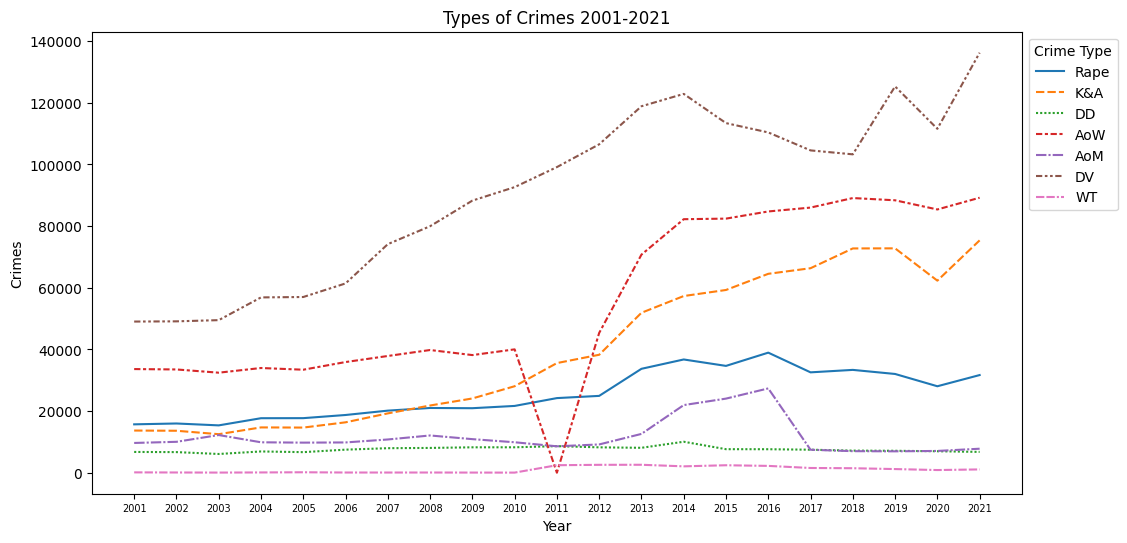

In [13]:
# Types of Crimes 2001-2021 - Lineplot
df_crimes = df.groupby('Year').sum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_crimes)
plt.title('Types of Crimes 2001-2021')
plt.xlabel('Year')
plt.ylabel('Crimes')
plt.xticks(rotation=0, size = 7)
plt.legend(title='Crime Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

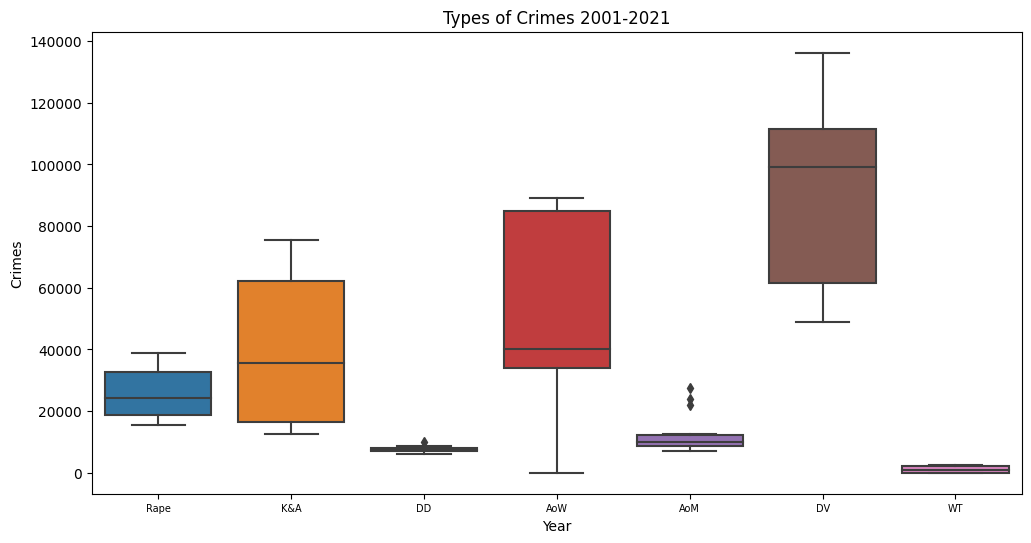

In [14]:
# Types of Crimes 2001-2021 - Boxplot
df_crimes = df.groupby('Year').sum()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_crimes)
plt.title('Types of Crimes 2001-2021')
plt.xlabel('Year')
plt.ylabel('Crimes')
plt.xticks(rotation=0, size = 7)
#plt.legend(title='Crime Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

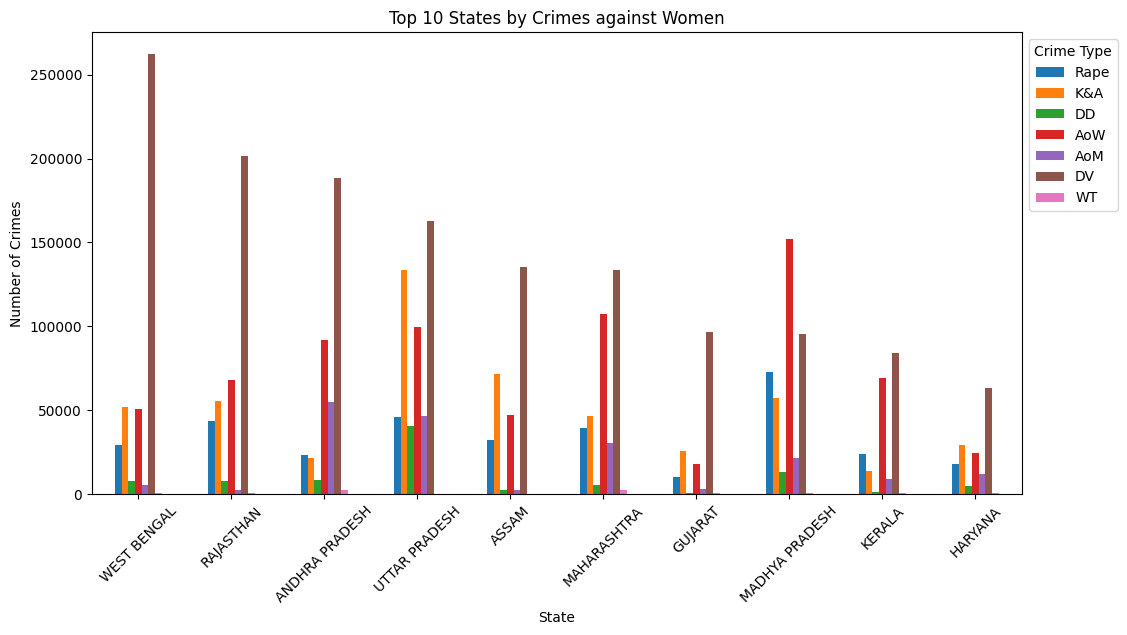

In [15]:
# Top 10 States by Crimes against Women 
df_crimes = df.groupby('State').sum().sort_values(by='DV', ascending=False).head(10)

df_crimes.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 States by Crimes against Women')
plt.xlabel('State')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

In [16]:
# Creating a column with the total of all crimes.
f = lambda x: sum(x[2:])
df['Total_crimes'] = (df.apply(f, axis = 1))

In [17]:
df.head()

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT,Total_crimes
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7,13669
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0,180
2,ASSAM,2001,817,1070,59,850,4,1248,0,4048
3,BIHAR,2001,888,518,859,562,21,1558,83,4489
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0,3964


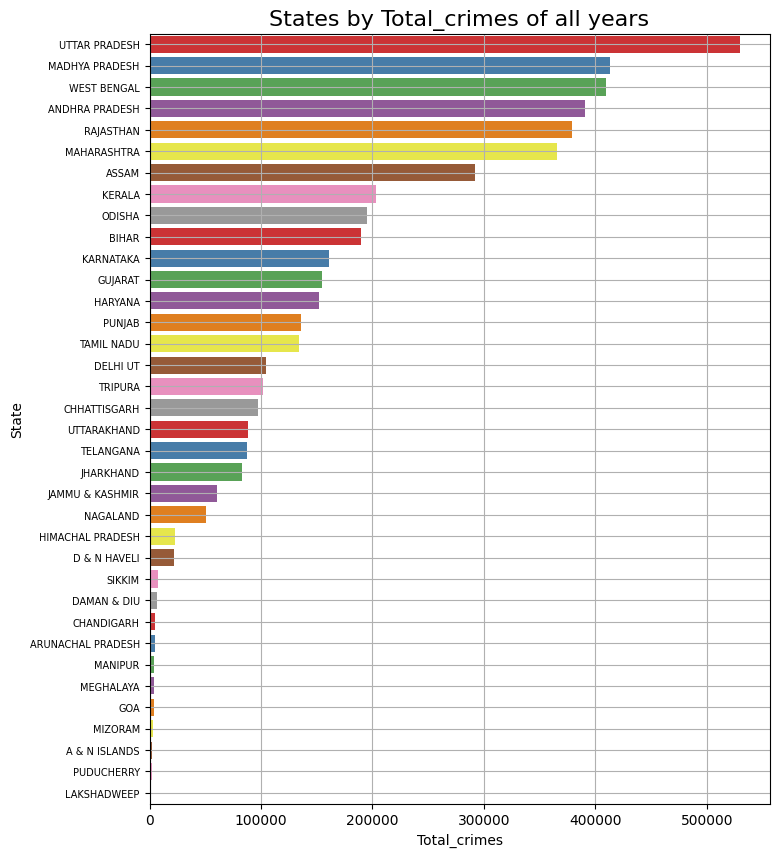

In [18]:
# States by Total of all crimes and all years

fig, ax = plt.subplots(figsize=(8, 10))
df_city = df.groupby(['State'])[['Total_crimes']].sum()
df_city.reset_index(level=0, inplace=True)
df_city = df_city.sort_values("Total_crimes", axis = 0, ascending = False)
sns.barplot(data=df_city, y="State", x="Total_crimes", palette = 'Set1')
plt.title("States by Total_crimes of all years", fontsize = 16)
plt.yticks(rotation=0, fontsize = 7)
plt.grid()
plt.show()

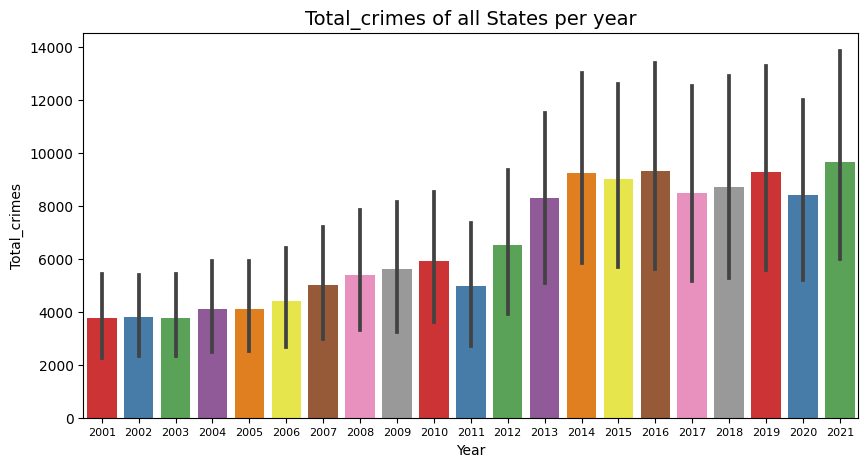

In [19]:
# Total_crimes of all States per year
df_year = df.groupby(['Year', 'State'])[['Total_crimes']].sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_year, x = 'Year', y = 'Total_crimes', palette = 'Set1')
plt.title("Total_crimes of all States per year", fontsize = 14)
plt.xticks(rotation=0, fontsize = 8)
plt.show()

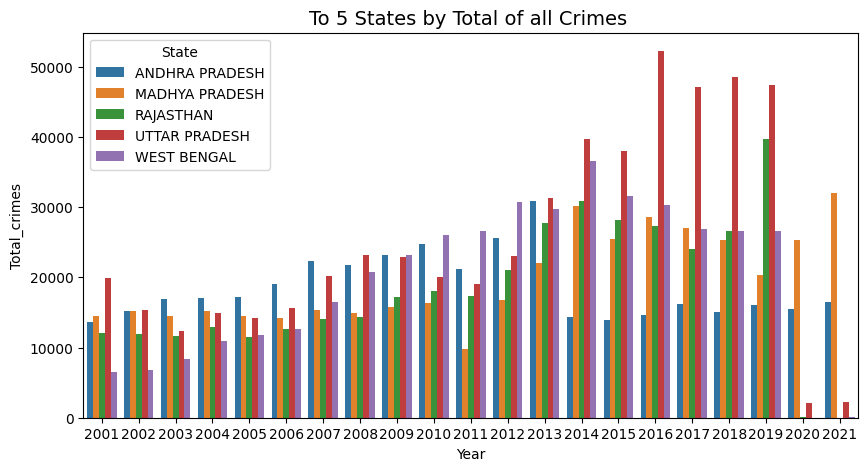

In [20]:
# Top 5 States
options = ['UTTAR PRADESH', 'MADHYA PRADESH', 'WEST BENGAL', 'ANDHRA PRADESH', 'RAJASTHAN']

# selecting rows based on condition
df_top = df.loc[df['State'].isin(options)]

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=df_top, x="Year", y="Total_crimes", hue="State")
plt.title("To 5 States by Total of all Crimes ", fontsize = 14)
plt.show()

<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#2368e1;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> The data for the years 2020 and 2021 are strange for some states. We will evaluate this further.</div>

In [21]:
cols = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']

In [22]:
# Let's create a dataframe just for the year 2021
df_2021 = df[df['Year'] == '2021']
df_2021.head()

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT,Total_crimes
700,ANDHRA PRADESH,2021,1188,613,108,5108,2370,7092,70,16549
701,ARUNACHAL PRADESH,2021,83,50,0,74,10,112,0,329
702,ASSAM,2021,1733,5739,198,4499,184,12950,22,25325
703,BIHAR,2021,786,8661,1000,387,1,2069,32,12936
704,CHHATTISGARH,2021,1093,1158,65,1248,238,963,3,4768


In [23]:
# Top States by Crimes - 2021

for col in cols:
    df_avg = df_2021.groupby("State")[col].sum().reset_index()
    df_avg = df_avg.sort_values(by=col, ascending=False)

    top_job = df_avg.head(10)
    fig = go.Figure()
    fig.add_trace(go.Bar(x=top_job["State"], y=top_job[col]))

    fig.update_layout(title= 'Top States by '+ col +' - 2021',
                  xaxis_title=col,
                  yaxis_title='',
                  plot_bgcolor='black', 
                  paper_bgcolor='#595964',  
                  font=dict(color='white'))

    pyo.init_notebook_mode(connected=True)
    pyo.iplot(fig)

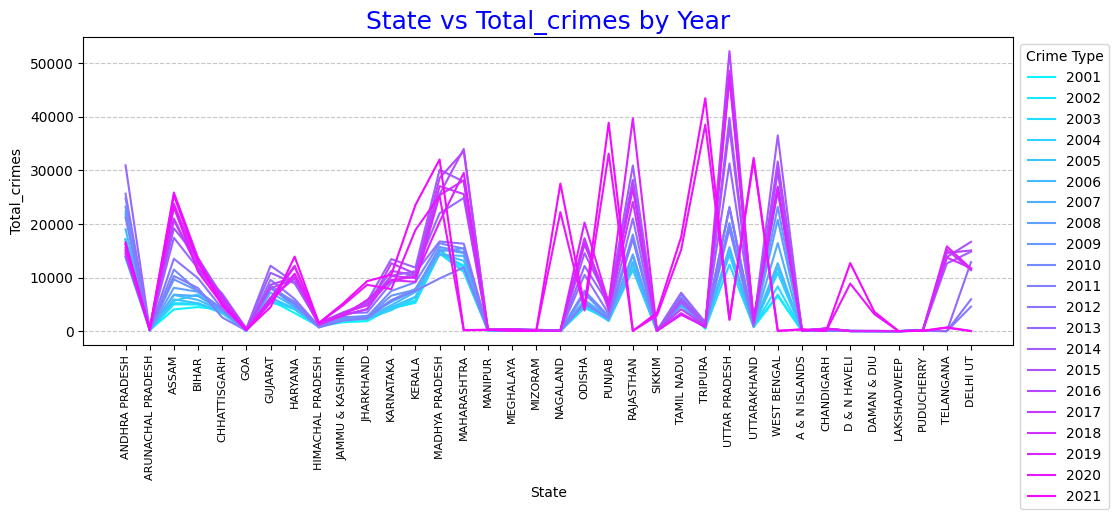

In [24]:
# State vs Total_crimes by Year
fig, ax = plt.subplots(figsize=(12, 4))
sns.lineplot(data=df, x="State", y="Total_crimes", hue="Year", palette = 'cool')
plt.title("State vs Total_crimes by Year", fontsize = 18, color = 'blue')
plt.xticks(rotation=90, fontsize = 8)
plt.legend(title='Crime Type', bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#2368e1;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> Again we see strange values in this graph. Now let's look at some States in particular.</div>

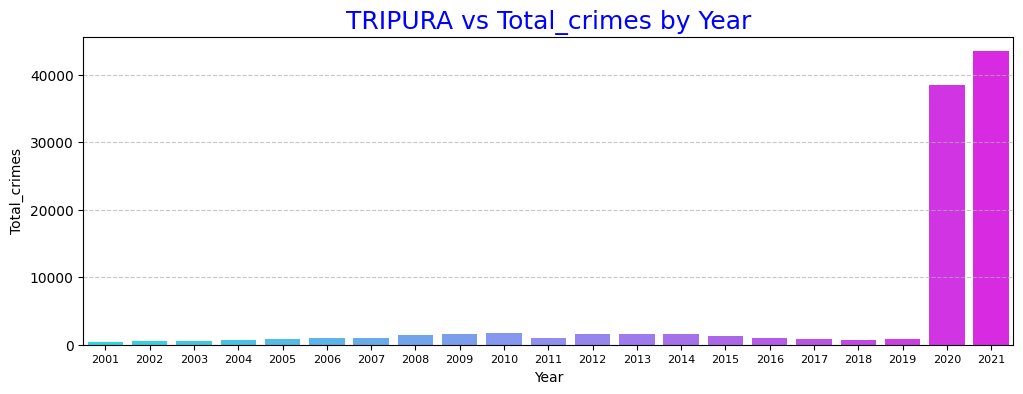

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT,Total_crimes
24,TRIPURA,2001,102,35,16,58,0,227,0,438
58,TRIPURA,2002,108,48,16,128,0,236,0,536
92,TRIPURA,2003,114,29,20,127,0,247,0,537
126,TRIPURA,2004,160,54,20,134,0,302,0,670
160,TRIPURA,2005,162,43,34,161,1,439,0,840
194,TRIPURA,2006,189,62,35,207,0,471,0,964
228,TRIPURA,2007,157,81,36,244,4,545,0,1067
262,TRIPURA,2008,204,110,16,346,4,735,0,1415
296,TRIPURA,2009,190,92,29,384,5,815,0,1515
330,TRIPURA,2010,238,91,25,376,9,937,0,1676


In [25]:
# State = TRIPURA

df_tripura = df[df['State'] == 'TRIPURA']

fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(data=df_tripura, x="Year", y="Total_crimes", palette = 'cool')
plt.title("TRIPURA vs Total_crimes by Year", fontsize = 18, color = 'blue')
plt.xticks(rotation=0, fontsize = 8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
df_tripura

<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#2368e1;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> We can see a steep increase in crimes in 2020 and 2021..</div>

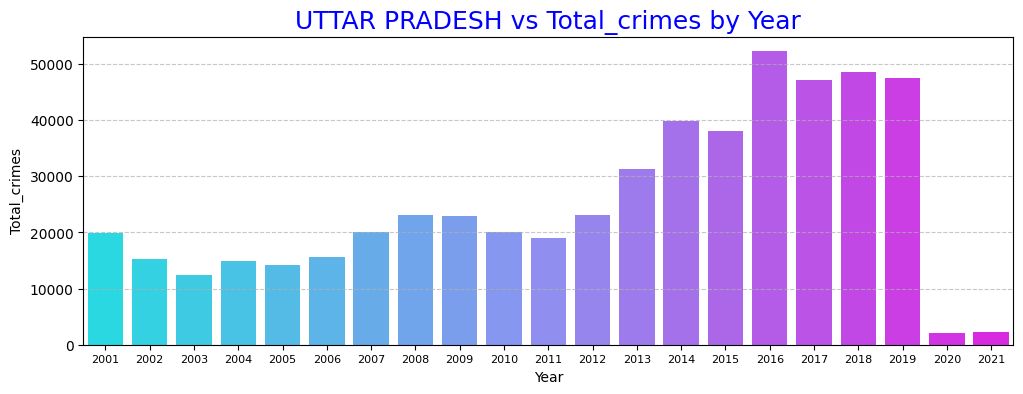

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT,Total_crimes
25,UTTAR PRADESH,2001,1958,2879,2211,2870,2575,7365,0,19858
59,UTTAR PRADESH,2002,1415,2298,1893,2145,1887,5679,0,15317
93,UTTAR PRADESH,2003,911,1499,1322,1098,4970,2626,0,12426
127,UTTAR PRADESH,2004,1397,2324,1708,1900,2682,4950,3,14964
161,UTTAR PRADESH,2005,1217,2256,1564,1835,2881,4505,0,14258
195,UTTAR PRADESH,2006,1314,2551,1798,2096,2714,5204,0,15677
229,UTTAR PRADESH,2007,1648,3363,2076,2522,2882,7650,0,20141
263,UTTAR PRADESH,2008,1871,4439,2237,2955,3374,8312,0,23188
297,UTTAR PRADESH,2009,1759,5078,2232,2782,2524,8566,0,22941
331,UTTAR PRADESH,2010,1563,5468,2217,2793,11,7978,0,20030


In [26]:
# State = UTTAR PRADESH

df_uttar = df[df['State'] == 'UTTAR PRADESH']

fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(data=df_uttar, x="Year", y="Total_crimes", palette = 'cool')
plt.title("UTTAR PRADESH vs Total_crimes by Year", fontsize = 18, color = 'blue')
plt.xticks(rotation=0, fontsize = 8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
df_uttar

<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#2368e1;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> 
We can see a dizzying reduction in crimes in 2020 and 2021.</div>

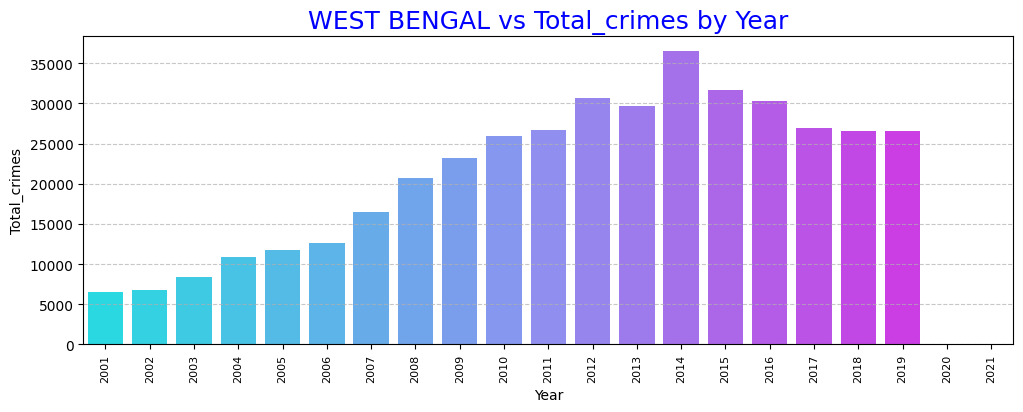

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT,Total_crimes
27,WEST BENGAL,2001,709,695,265,954,48,3859,3,6533
61,WEST BENGAL,2002,759,694,273,964,34,4069,1,6794
95,WEST BENGAL,2003,1002,801,329,1186,71,4948,1,8338
129,WEST BENGAL,2004,1475,1018,396,1566,64,6334,12,10865
163,WEST BENGAL,2005,1686,1039,446,1572,54,6936,61,11794
197,WEST BENGAL,2006,1731,1199,445,1837,63,7414,1,12690
231,WEST BENGAL,2007,2106,1590,451,2281,99,9900,5,16432
265,WEST BENGAL,2008,2263,1907,451,2396,94,13663,5,20779
299,WEST BENGAL,2009,2336,2187,506,1942,108,16112,5,23196
333,WEST BENGAL,2010,2311,2764,507,2465,163,17796,8,26014


In [27]:
# State = WEST BENGAL

df_west = df[df['State'] == 'WEST BENGAL']

fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(data=df_west, x="Year", y="Total_crimes", palette = 'cool')
plt.title("WEST BENGAL vs Total_crimes by Year", fontsize = 18, color = 'blue')
plt.xticks(rotation=90, fontsize = 8)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
df_west

<div class="alert alert-block alert-info" style="background-color:caf0f8;color:#2368e1;border-color:black;width:80%;margin: auto;text-align: center;">
<b>Insight:</b> We can see a dizzying reduction in crimes in 2020 and 2021.</div>

<b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>After these analyses, I have doubts about the veracity of this dataset in the years 2020 and 2021. Crimes in some states fluctuate a lot up or down in some states in 2020 and 2021. It could be just a change in the jurisdiction of the states, but it is not possible to be sure.</div></b>

<b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>By evaluating all states together (India), it is possible to identify an increase in crimes against women from 2001 to 2014. In the period from 2014 to 2021 we see a certain stability.</div></b>

## <b><div style='padding:15px;background-color:#001BC7;color:white;border-radius:40px;font-size:110%;text-align: center'>If you liked this code, consider upvoting it. Thank you.</div></b>